<a href="https://colab.research.google.com/github/TanyaAgrwal/Machine-learning/blob/main/Prediction_using_Decision_tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prediction using Decision Tree Algorithm**

## **Submitted by- TANYA AGARWAL**

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Iris.csv to Iris (1).csv
User uploaded file "Iris.csv" with length 5107 bytes


In [2]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv(io.StringIO(uploaded['Iris.csv'].decode('utf-8')))
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


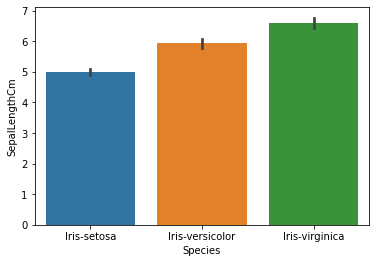

In [3]:
import seaborn as sns
sns.barplot(x=df['Species'], y=df['SepalLengthCm'])

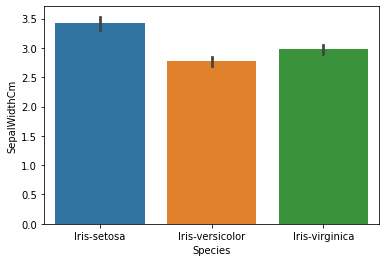

In [4]:
sns.barplot(x=df['Species'], y=df['SepalWidthCm'])

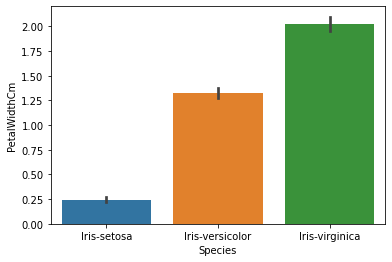

In [5]:
sns.barplot(x=df['Species'], y=df['PetalWidthCm'])

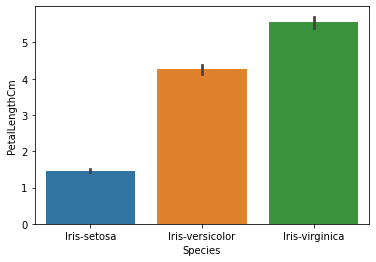

In [6]:
sns.barplot(x=df['Species'], y=df['PetalLengthCm'])

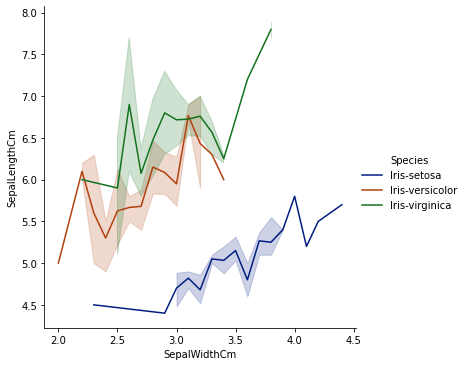

In [7]:
sns.relplot(x=df['SepalWidthCm'], y=df['SepalLengthCm'], hue=df['Species'], palette='dark', kind='line')

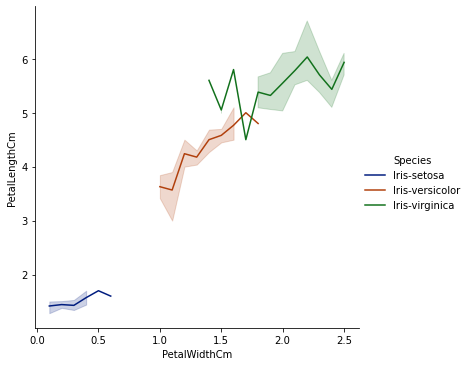

In [8]:
sns.relplot(x=df['PetalWidthCm'], y=df['PetalLengthCm'], hue=df['Species'], palette='dark', kind='line')

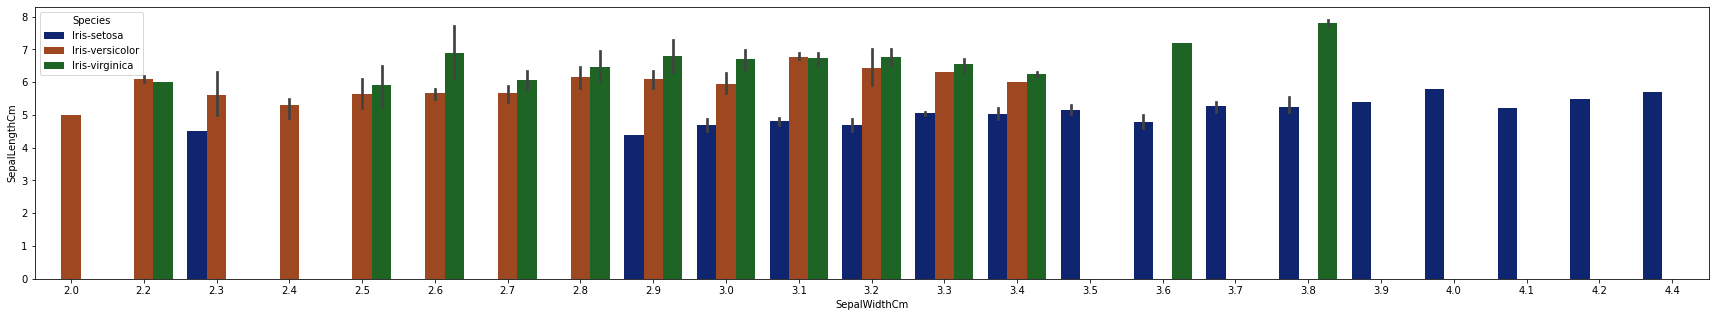

In [9]:
plt.figure(figsize=(30,5))
sns.barplot(x=df['SepalWidthCm'], y=df['SepalLengthCm'], hue=df['Species'], palette='dark')

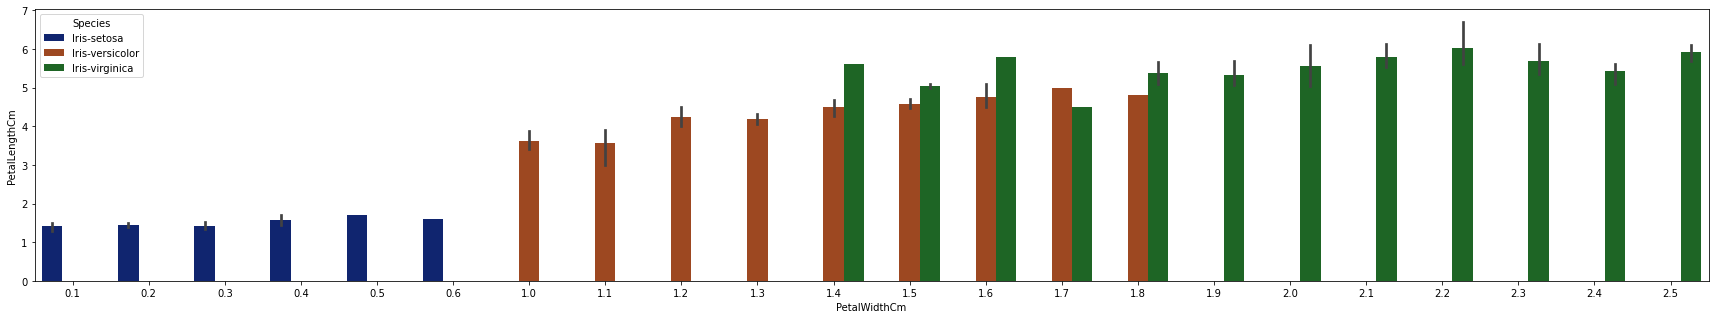

In [10]:
plt.figure(figsize=(30,5))
sns.barplot(x=df['PetalWidthCm'], y=df['PetalLengthCm'], hue=df['Species'], palette='dark')

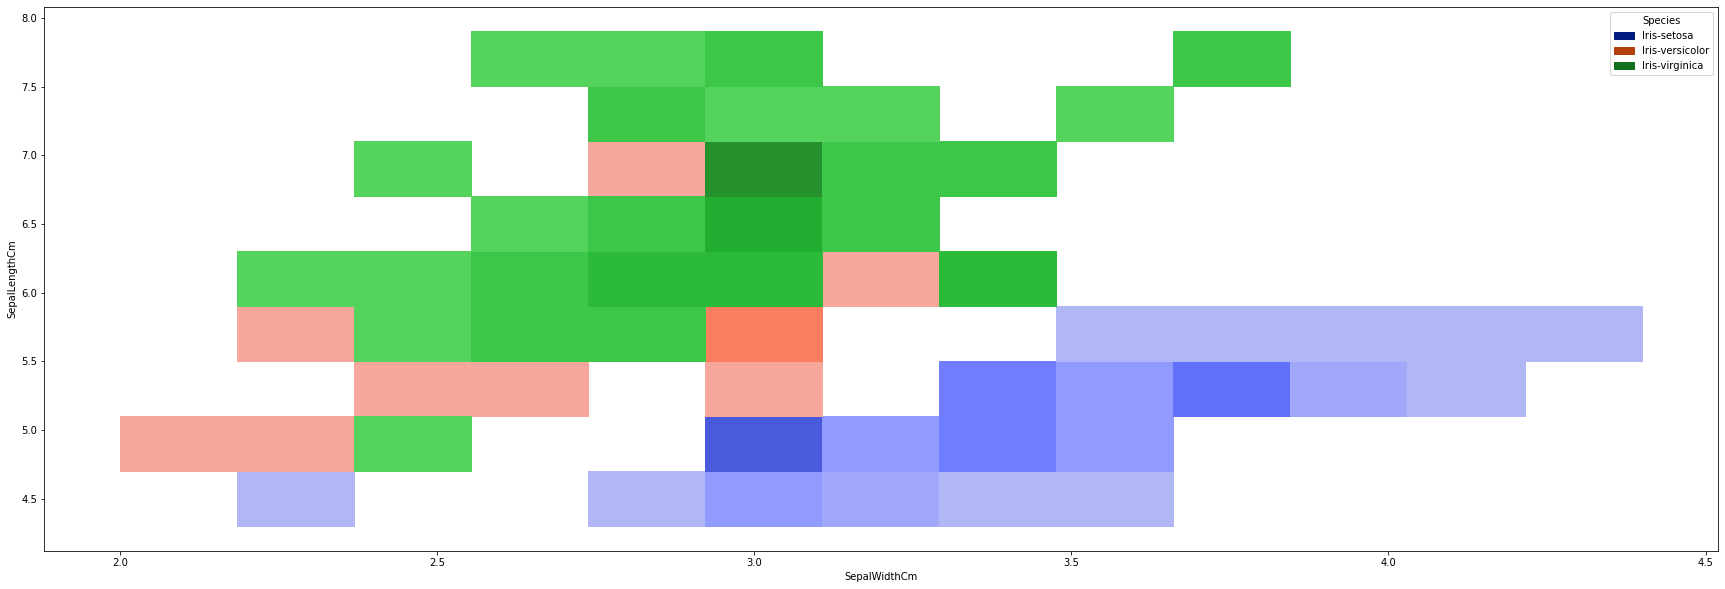

In [11]:
plt.figure(figsize=(30,10))
sns.histplot(x=df['SepalWidthCm'], y=df['SepalLengthCm'], hue=df['Species'], palette='dark')

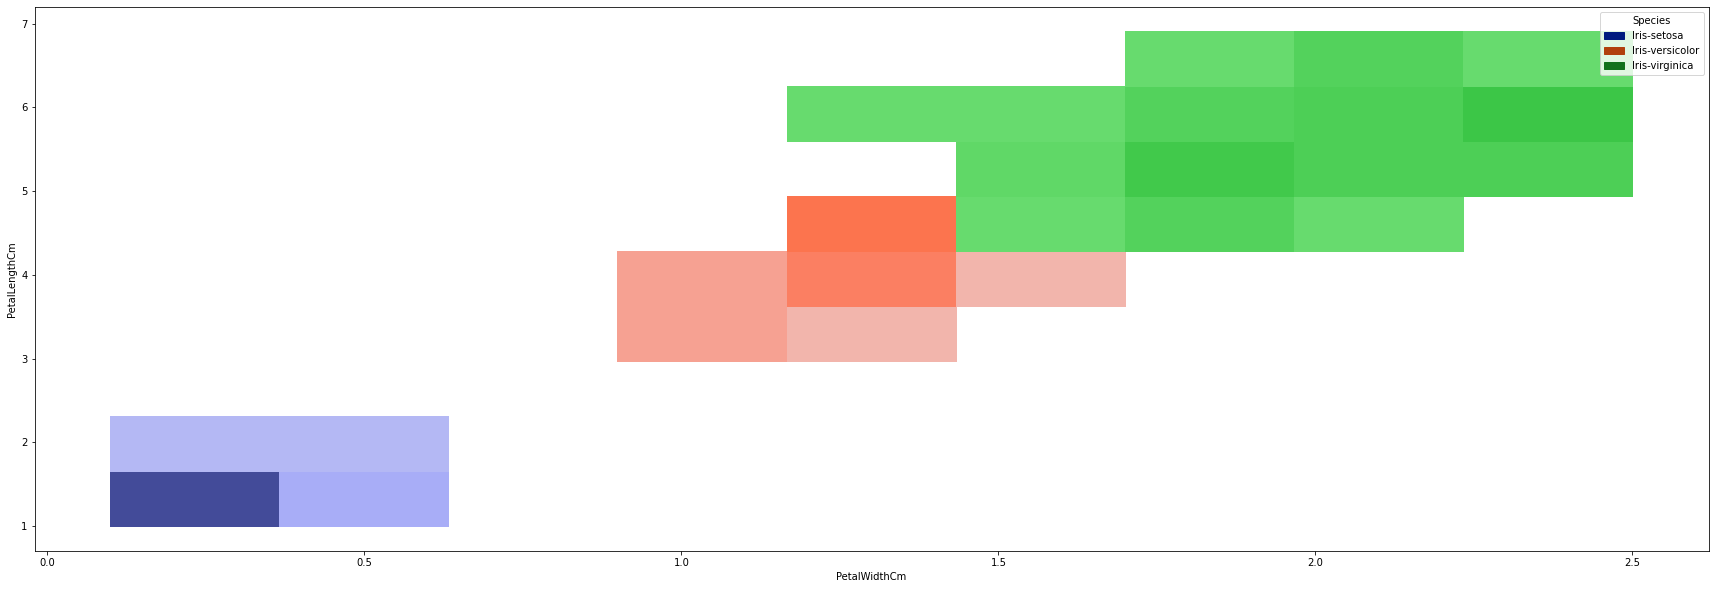

In [12]:
plt.figure(figsize=(30,10))
sns.histplot(x=df['PetalWidthCm'], y=df['PetalLengthCm'], hue=df['Species'], palette='dark')

In [13]:
x=df.drop(['Id','Species'], axis=1)
y=df['Species'].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.1, random_state=0, stratify=y)

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier(criterion='gini', random_state=0)
dtr.fit(X_train, y_train)
y_pred=dtr.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.9333333333333333


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff9a1b53940>)

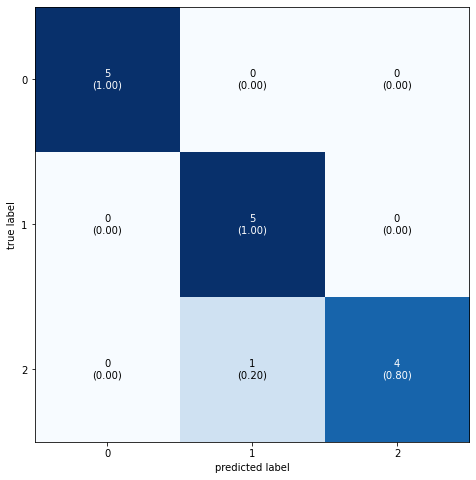

In [17]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cm, figsize=(8,8),show_normed=True)

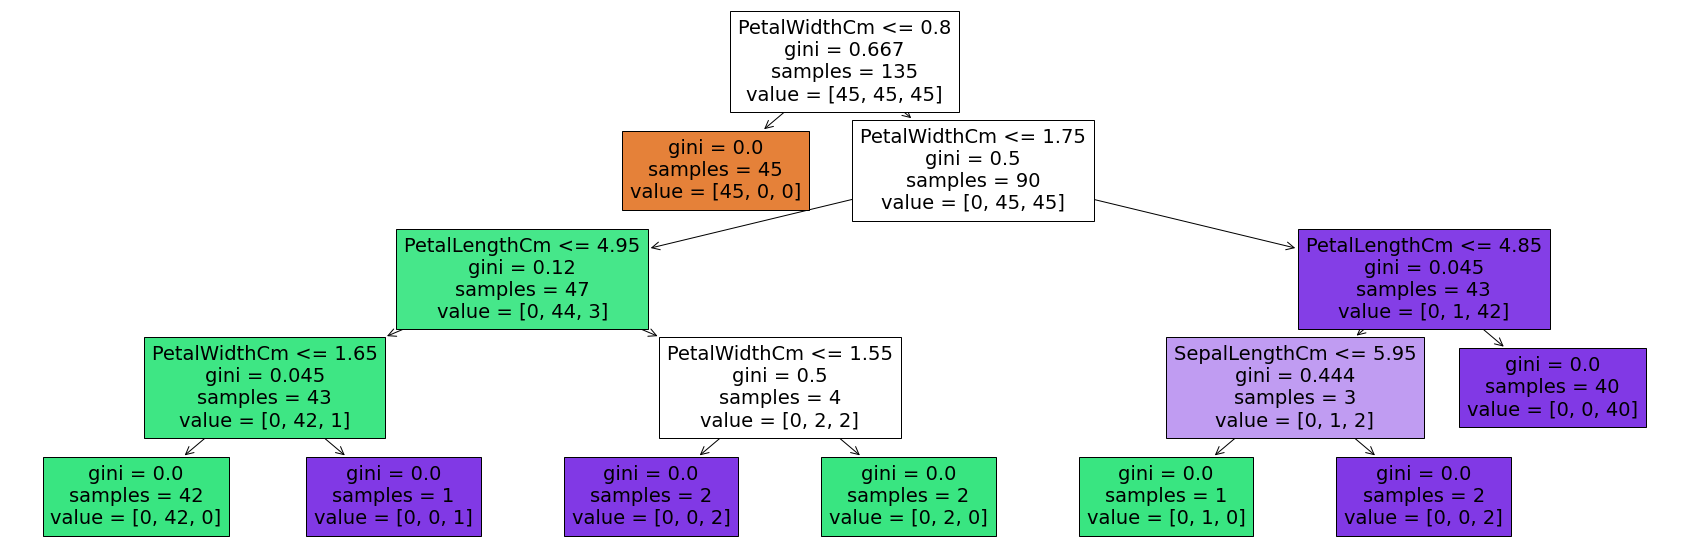

In [18]:
from sklearn import tree
plt.figure(figsize=(30,10))
tree.plot_tree(dtr, feature_names=['SepalLengthCm'	,'SepalWidthCm'	,'PetalLengthCm'	,'PetalWidthCm'], filled=True)
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
en1=LabelEncoder()
y_test=en1.fit_transform(y_test)
y_pred=en1.fit_transform(y_pred)

new_df=pd.DataFrame({'Actual: ':y_test, 'Predicted: ': y_pred})
new_df

,Actual:,Predicted:
0,1,1
1,0,0
2,1,1
3,0,0
4,2,2
5,0,0
6,0,0
7,1,1
8,1,1
9,2,1


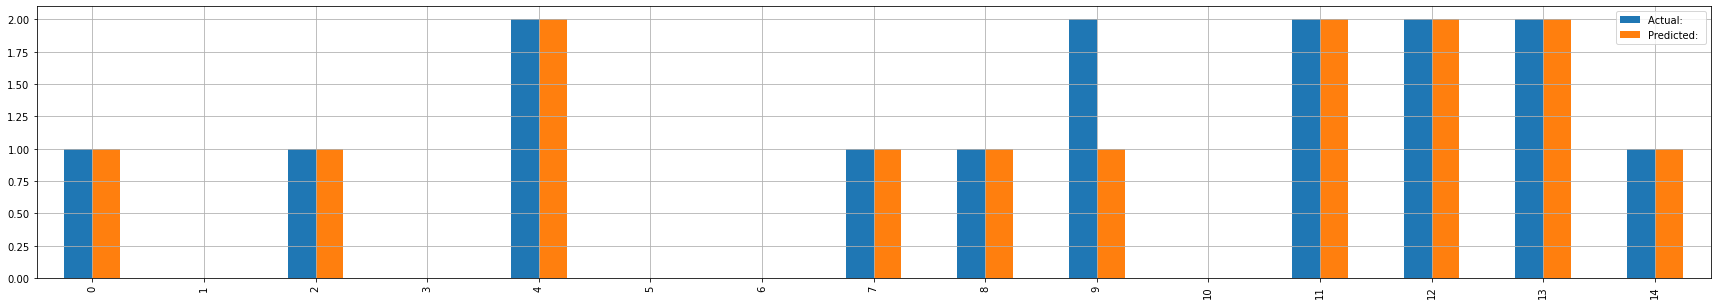

In [20]:
new_df.plot(kind='bar', figsize=(30,5))
plt.grid()
plt.show()

In [21]:
predict_instance=dtr.predict(np.array([[5.2,3.4,2.1,0.1]])).reshape(-1,1)
predict_instance

array([['Iris-setosa']], dtype=object)